In [21]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [158]:

df= web.DataReader('BAC', data_source='yahoo', start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.890000,5.740000,5.750000,5.800000,246293200.0,5.042953
2012-01-04,5.880000,5.620000,5.710000,5.810000,243711200.0,5.051648
2012-01-05,6.350000,5.710000,5.750000,6.310000,547780000.0,5.486384
2012-01-06,6.300000,6.060000,6.210000,6.180000,299630600.0,5.373353
2012-01-09,6.370000,6.190000,6.260000,6.270000,240614400.0,5.451606
...,...,...,...,...,...,...
2019-12-11,33.759998,33.480000,33.480000,33.639999,43107800.0,32.297302
2019-12-12,34.810001,33.680000,33.779999,34.680000,64942500.0,33.295788
2019-12-13,34.959999,34.349998,34.689999,34.439999,48539600.0,33.065372


In [159]:
#Get the number of rows and columnsin data  set
df.shape

(2003, 6)

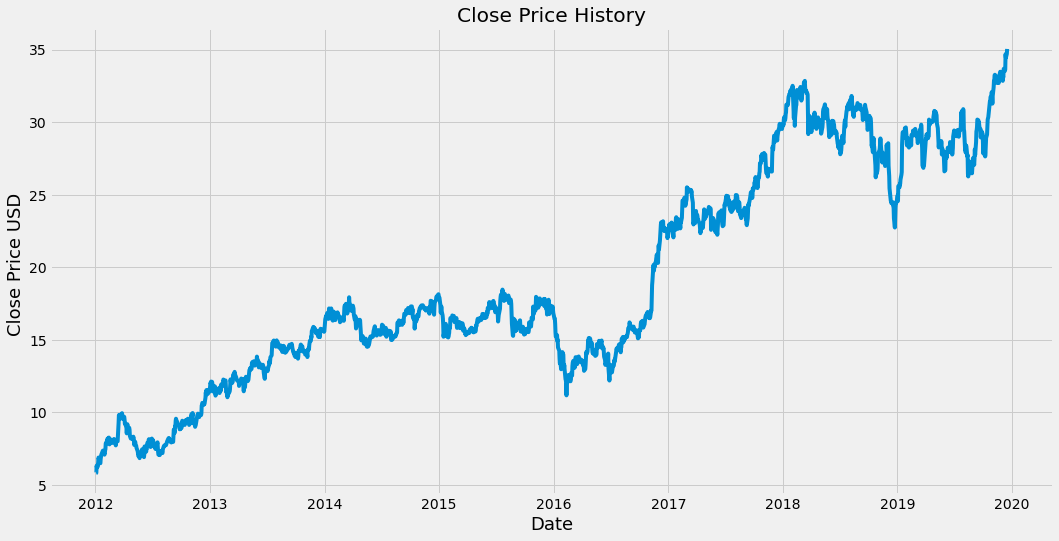

In [160]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ', fontsize=18)
plt.show()

In [161]:
#create a new  dataframe with only the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

1603

In [162]:
dataset

array([[ 5.80000019],
       [ 5.80999994],
       [ 6.30999994],
       ...,
       [34.43999863],
       [34.70000076],
       [35.04000092]])

In [12]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [3.41988776e-04],
       [1.74418516e-02],
       ...,
       [9.79480086e-01],
       [9.88372088e-01],
       [1.00000000e+00]])

In [13]:

train_data = scaled_data[0:training_data_len , :]
x_train = [] 
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)

[array([0.        , 0.00034199, 0.01744185, 0.01299588, 0.01607386,
       0.02838577, 0.0365937 , 0.03385772, 0.02770178, 0.02325581,
       0.03419973, 0.03967168, 0.04343365, 0.0495896 , 0.05095758,
       0.05300956, 0.05129959, 0.05095758, 0.04343365, 0.04548563,
       0.05335157, 0.05642953, 0.06976744, 0.07421339, 0.07010943,
       0.07968536, 0.08139535, 0.07763336, 0.08378932, 0.0745554 ,
       0.06771546, 0.07831737, 0.0759234 , 0.07900135, 0.0735294 ,
       0.0759234 , 0.07113543, 0.07660738, 0.07934335, 0.07421339,
       0.07934335, 0.07968536, 0.07421339, 0.06532147, 0.0759234 ,
       0.07729139, 0.07694938, 0.07489738, 0.09199725, 0.10396716,
       0.11764704, 0.1367989 , 0.12756496, 0.13714091, 0.13748288,
       0.12995896, 0.1385089 , 0.14124487, 0.12995896, 0.13508891])]
[0.1275649606627293]


In [17]:
#convert the x_train and y_train to numpy arrays
x_train , y_train = np.array(x_train) , np.array(y_train)

In [19]:
#reshape the data
x_train= np.reshape(x_train , (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences=True ,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
model.add(Dense(1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 30,653
Trainable params: 30,653
Non-trainable params: 0
_________________________________________________________________


In [28]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [29]:
#train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 23s 14ms/step - loss: 0.0026


In [30]:
#create the testing data set
#creating the new array containing scaled value from index 1543 to 2003
test_data= scaled_data[training_data_len- 60: , :]
#create the new data sets x_test and y_test
x_test = [
]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i , 0])


In [31]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [32]:
#reshape the data
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [33]:
 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[31.44897 ],
       [31.573109],
       [31.638441],
       [31.680893],
       [31.721579],
       [31.727978],
       [31.701006],
       [31.651018],
       [31.514393],
       [31.368391],
       [31.189356],
       [31.02371 ],
       [30.872972],
       [30.72484 ],
       [30.64628 ],
       [30.615763],
       [30.617207],
       [30.645567],
       [30.680904],
       [30.716625],
       [30.729527],
       [30.714537],
       [30.689064],
       [30.647076],
       [30.595757],
       [30.54382 ],
       [30.475534],
       [30.37117 ],
       [30.255104],
       [30.117281],
       [30.000622],
       [29.87168 ],
       [29.751719],
       [29.612839],
       [29.481228],
       [29.366716],
       [29.332312],
       [29.334717],
       [29.357695],
       [29.40099 ],
       [29.441448],
       [29.554838],
       [29.71636 ],
       [29.909805],
       [30.086115],
       [30.272724],
       [30.488966],
       [30.7132  ],
       [30.945095],
       [31.159164],


In [175]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

0.6684687042236328

<ipython-input-176-7d5b52f565f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


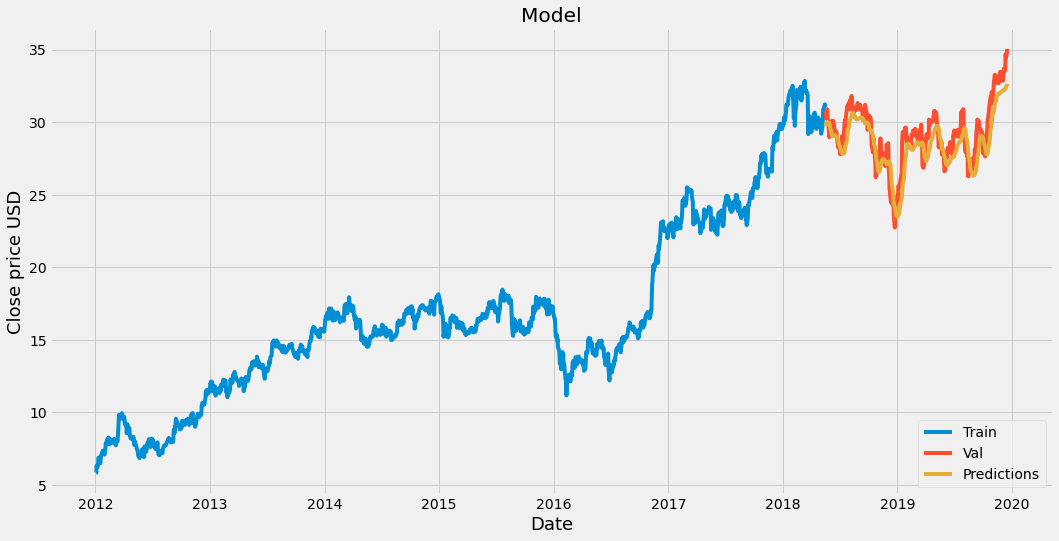

In [176]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [177]:
#show the valid and predictions prices
valid

,Close,Predictions
Date,,
2018-05-17,30.809999,29.736540
2018-05-18,30.260000,29.848516
2018-05-21,30.549999,29.912043
2018-05-22,30.889999,29.955185
2018-05-23,30.440001,29.996811
...,...,...
2019-12-11,33.639999,32.286507
2019-12-12,34.680000,32.323792
2019-12-13,34.439999,32.413517
